In [1]:
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures 
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge
import numpy as np

Part I: Perform data analysis of the dataset

1.1 How many entries and variables does the data set comprise?

In [201]:
df = pd.read_csv('btc.csv')
print("The Shape is",df.shape)
print("The Columns are:")
for col in df.columns: 
    print(col) 

The Shape is (1048575, 8)
The Columns are:
Timestamp
Open
High
Low
Close
Volume_(BTC)
Volume_(Currency)
Weighted_Price


1.2 What types of data is included?

In [112]:
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

1.3 Are there any data missing?

In [119]:
df.isnull().any()

Timestamp            False
Open                  True
High                  True
Low                   True
Close                 True
Volume_(BTC)          True
Volume_(Currency)     True
Weighted_Price        True
dtype: bool

1.4 Provide the main statistics about the entries of the dataset (mean, std, etc.)

In [121]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.048575e+06,342169.000000,342169.000000,342169.000000,342169.000000,342169.000000,3.421690e+05,342169.000000
mean,1.356775e+09,229.456116,229.802477,229.064930,229.440478,16.274528,4.485655e+03,229.420213
std,1.816186e+07,271.716593,272.238257,271.141889,271.711086,48.128862,1.951265e+04,271.664754
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000e+00,3.800000
25%,1.341047e+09,93.490000,93.540000,93.420000,93.490000,0.989954,9.900000e+01,93.482705
50%,1.356775e+09,121.110000,121.180000,121.000000,121.090000,3.026490,3.280394e+02,121.102502
75%,1.372504e+09,194.300000,194.460000,194.150000,194.300000,12.000000,1.782326e+03,194.299996
max,1.388232e+09,1163.000000,1163.000000,1162.990000,1163.000000,2958.477574,1.543035e+06,1162.999574


1.5 Visualize the data (min 3 graphs), e.g. correlation between different variables.Are there any interesting patterns?

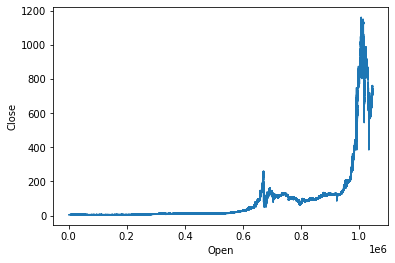

In [136]:
plt.plot(df['Open'])
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


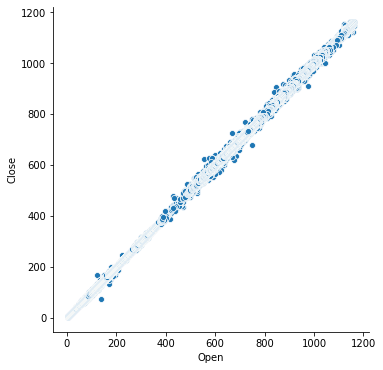

In [131]:
sns.pairplot(x_vars=["Open"], y_vars=["Close"], data=df, size=5)

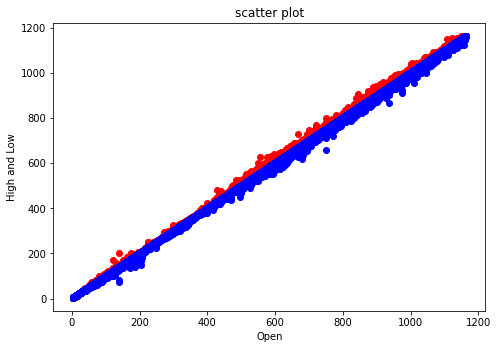

In [138]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['Open'], df['High'], color='r')
ax.scatter(df['Open'], df['Low'], color='b')
ax.set_xlabel('Open')
ax.set_ylabel('High and Low')
ax.set_title('scatter plot')
plt.show()

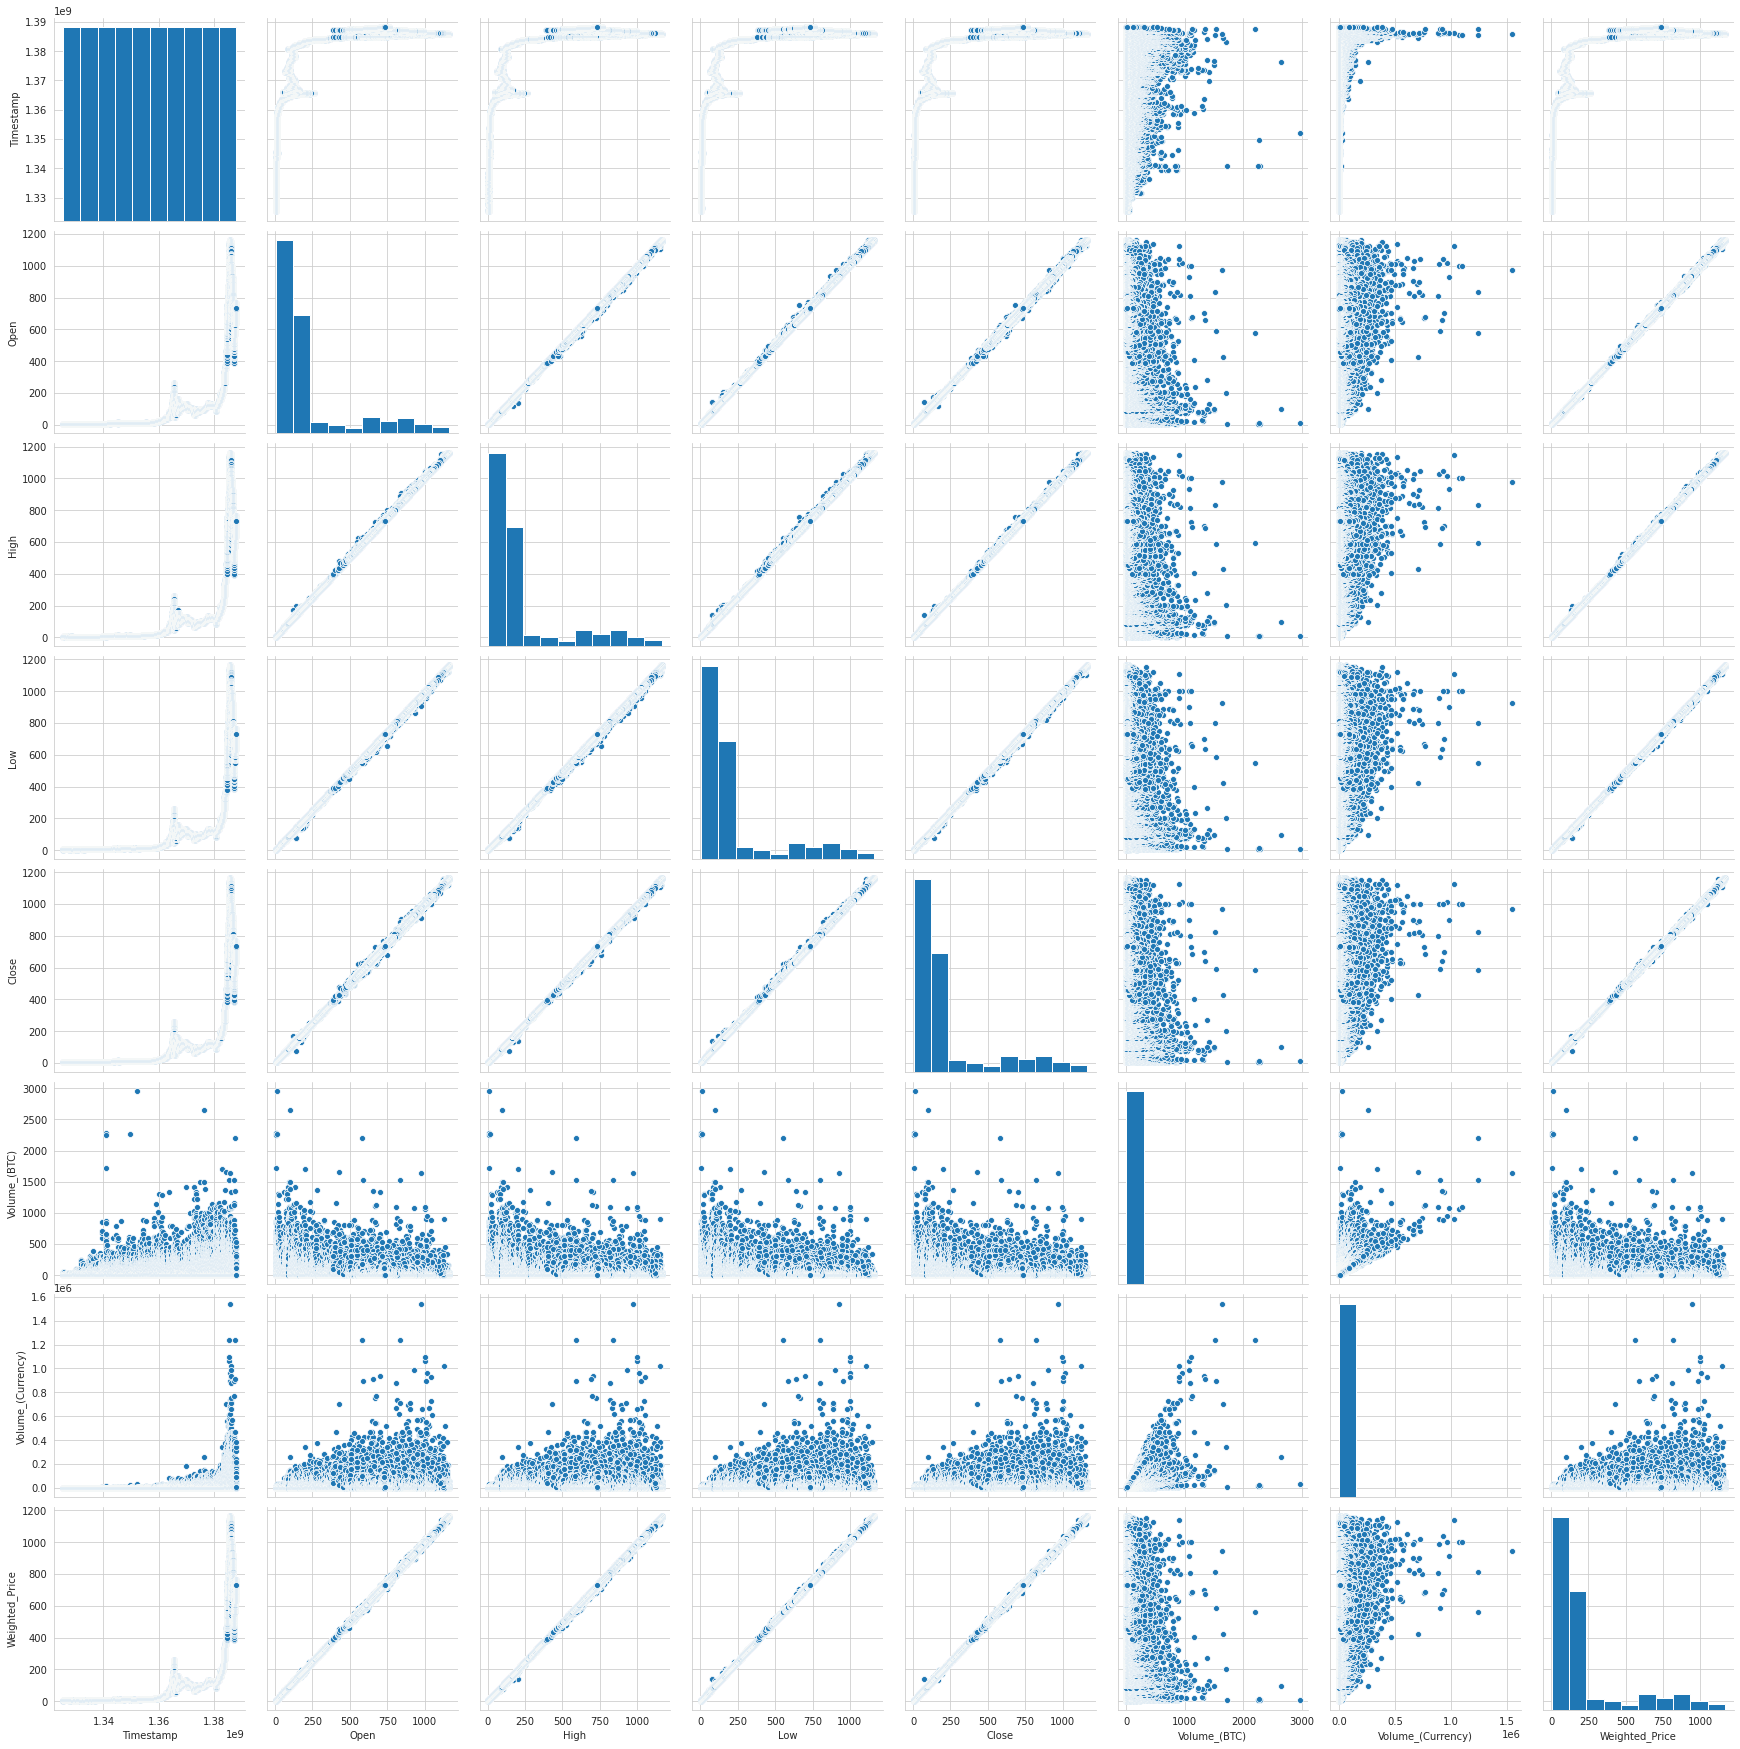

In [139]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,height=3)
plt.show()

Part II: Apply ML analysis

1.Choose the features and targets in the dataset.


---


2.Preprocess the dataset for training (e.g. cleaning and filling the missing variables,split between training/testing/validation).

---


3.Apply ML algorithms (min 3 algorithms) to model the target variable. This can beeither classification or regression task. You can use any of the libraries withinbuilt ML functions.

---


4.Provide the comparison of the results of different ML models you have used. Thiscan be in the form of graph representation and your reasoning about the results

In [7]:
#Data Cleaning and Splitting of Data
dfn = pd.read_csv('btc.csv')
dfn=dfn.dropna(how='any')
dfn['Date'] = pd.to_datetime(dfn['Timestamp'],unit='s').dt.date
group = dfn.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])
df=new_df
df['Prediction'] = df[['Close']].shift(-20)
x = np.array(df.drop(['Prediction'],1))
x = preprocessing.scale(x)
x_forecast = x[-20:]
x = x[:-20]
y = np.array(df['Prediction'])
y = y[:-20]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Linear Regression**

In [10]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
acc = regr.score(x_test, y_test)
print("The Accuracy of our Models is  ", acc)
future_prediction = regr.predict(x_forecast)
rms = sqrt(mean_squared_error(y_test, y_pred))

print("RMS is",rms)

The Accuracy of our Models is   0.3215673410054112
RMS is 145.82283124382477


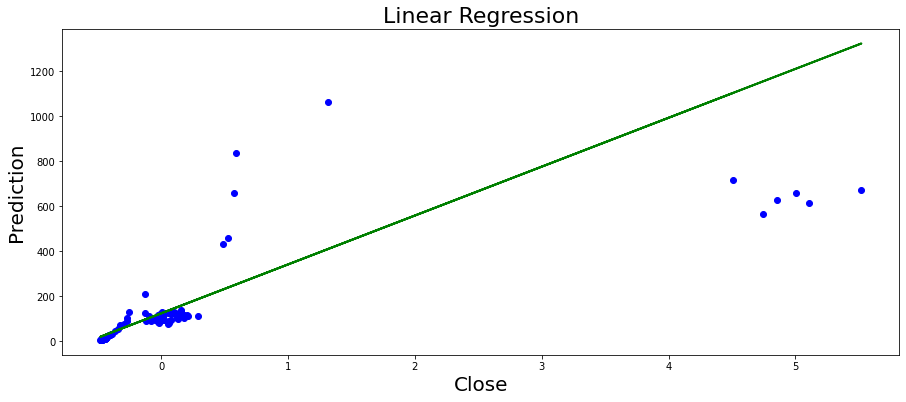

In [11]:
rcParams['figure.figsize'] = 15, 6
plt.scatter(x_test, y_test, color='blue', label='test_data')
plt.plot(x_test,y_pred, color='green', linewidth=2,label='predicted data')
plt.title("Linear Regression",fontsize=22)
plt.xlabel('Close',fontsize=20)
plt.ylabel('Prediction',fontsize=20)
plt.show()

Ridge Regression

The Accuracy of Ridge Model is 0.3239291257105934


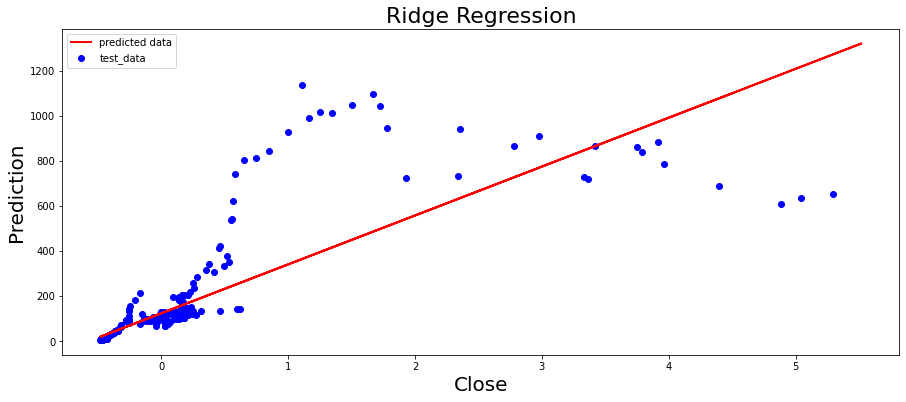

In [12]:
rdg = Ridge(alpha = 0.5)
rdg.fit(x_train, y_train)
y_ridge = rdg.predict(x_test)
print('The Accuracy of Ridge Model is',(rdg.score(x_test,y_test)) )
rdg_prediction = rdg.predict(x_forecast)

plt.close()
rcParams['figure.figsize'] = 15, 6
plt.scatter(x_train, y_train, color='blue', label='test_data')
plt.plot(x_test,y_ridge, color='red', linewidth=2,label='predicted data')
plt.title("Ridge Regression",fontsize=22)
plt.xlabel('Close',fontsize=20)
plt.ylabel('Prediction',fontsize=20)
plt.legend()
plt.show()

Polynomial Regression

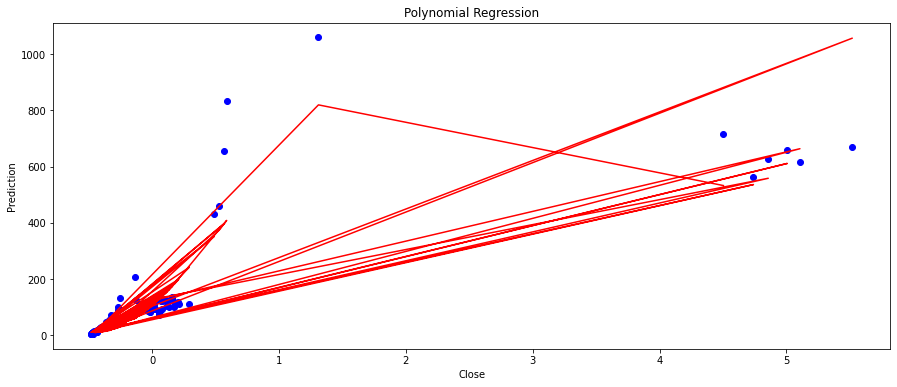

In [13]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train) 
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
plt.scatter(x_test, y_test, color = 'blue') 
plt.plot(x_test, lin2.predict(poly.fit_transform(x_test)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Close') 
plt.ylabel('Prediction') 
  
plt.show() 

Elastic Net

0.6081295255568431


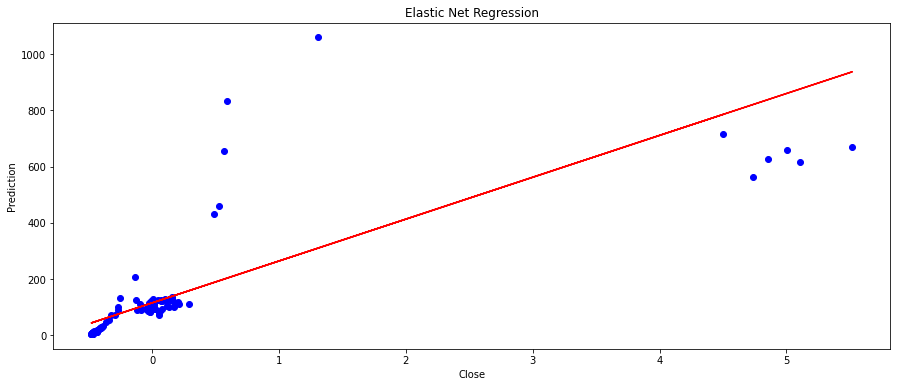

In [14]:
from sklearn import linear_model
ENreg = linear_model.ElasticNet(alpha = 0.5,random_state = 0)
ENreg.fit(x_train,y_train)
print(ENreg.score(x_test,y_test))
plt.scatter(x_test, y_test, color = 'blue') 
plt.plot(x_test, ENreg.predict(x_test), color = 'red') 
plt.title('Elastic Net Regression') 
plt.xlabel('Close') 
plt.ylabel('Prediction') 
  
plt.show() 


Observations:

---


1)After applying Linear Regression to the model we are getting around 32% accuracy and RMS of around 150.


---

2) Even Ridge Regression is giving us the same accuracy which is around 32%



---
3)When we are applying Polynomial Regression on the model, its going haywire which is clearly visible from graph and seems to have zero accuracy.

---

4)When using the Elastic Net model we are getting comparitively a better accuracy of around 60% which is quite goood and can be a accepted standard.


---

5)Looking at the different models, its very difficult to apply a algorithm which can predict the future price because there are n-number of variables on which a price of bitcoin might depend on. We are taking only a very small set of variables to detrmine the price which is not at all sufficient. To get a better model, other factors should also be taken into account.


Part III: Employ multiple datasets and extract insights

1.Choose any related dataset to your current one. Combine the two into onedataset. The combined dataset doesn’t have size requirements.


---


2.Choose the correlated variables.

---



3.Perform statistical analysis on finding the correlation between selected featuresfrom both datasets. Examples:a.Find the correlation between the crime and the number of schools in thearea.b.Find the correlation between the traffic and the population in the area


---


4.Analyse the results and any interesting patterns

In [2]:
dfn = pd.read_csv('btc.csv')
dfn=dfn.dropna(how='any')
dfn['Date'] = pd.to_datetime(dfn['Timestamp'],unit='s').dt.date
group = dfn.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])
df=new_df
df['Prediction'] = df[['Close']].shift(-20)


In [229]:
df.head()

,Close,Prediction
Date,,
2011-12-31,4.471603,6.835000
2012-01-01,4.806667,6.386000
2012-01-02,5.000000,6.485000
2012-01-03,5.252500,6.407500
2012-01-04,5.208159,6.495556


In [3]:
gold=pd.read_csv('gold.csv')
print(gold.head())

         Date         Open         High  ...        Close    Adj Close  Volume
0  2012-01-03  1568.900024  1604.300049  ...  1599.699951  1599.699951   289.0
1  2012-01-04  1596.599976  1618.599976  ...  1611.900024  1611.900024   229.0
2  2012-01-05  1610.800049  1624.099976  ...  1619.400024  1619.400024   172.0
3  2012-01-06  1622.500000  1627.800049  ...  1616.099976  1616.099976   362.0
4  2012-01-08          NaN          NaN  ...          NaN          NaN     NaN

[5 rows x 7 columns]


In [4]:
gold = pd.DataFrame(gold, columns = ['Open', 'Close','Date']) 

In [5]:
gold=gold.dropna(how='any')

In [6]:
gold.isnull().any()

Open     False
Close    False
Date     False
dtype: bool

In [7]:
df['GD-Close']=np.nan
df['GD-Open']=np.nan

In [8]:
gold['Date']=pd.to_datetime(gold['Date']).dt.date

In [9]:
gold.head()

,Open,Close,Date
0,1568.900024,1599.699951,2012-01-03
1,1596.599976,1611.900024,2012-01-04
2,1610.800049,1619.400024,2012-01-05
3,1622.500000,1616.099976,2012-01-06
5,1614.300049,1607.500000,2012-01-09


In [10]:
for index, row in df.iterrows():
  for i,r in gold.iterrows():
    if(index == r['Date']):
      row['GD-Open']=r['Open']
      row['GD-Close']=r['Close'] 

In [11]:
df=df.dropna(how='any')

In [12]:
normalized_df=(df-df.mean())/df.std()

In [13]:
print(normalized_df.head())

               Close  Prediction  GD-Close   GD-Open
Date                                                
2012-01-03 -0.474909   -0.479696  0.307706  0.114212
2012-01-04 -0.475213   -0.479232  0.381809  0.283209
2012-01-05 -0.467838   -0.480348  0.427363  0.369844
2012-01-06 -0.466777   -0.480873  0.407319  0.441225
2012-01-09 -0.465791   -0.483445  0.355083  0.391198


Heat Map of Correalation of Data

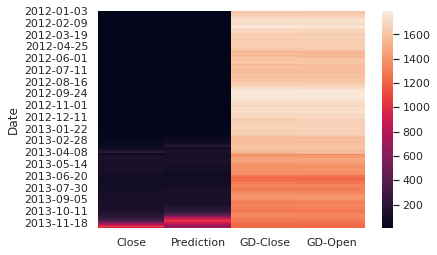

In [21]:
import seaborn as sns; sns.set()
sns.heatmap(df)

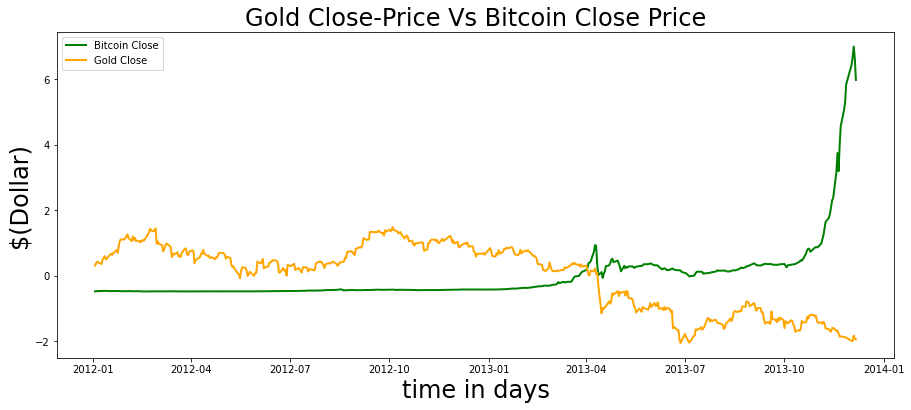

In [248]:
plt.plot(normalized_df['Close'],color='green', lw=2, label='Bitcoin Close')
plt.plot(normalized_df['GD-Close'],color='orange', lw=2, label='Gold Close')
plt.title("Gold Close-Price Vs Bitcoin Close Price",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend()
plt.show()

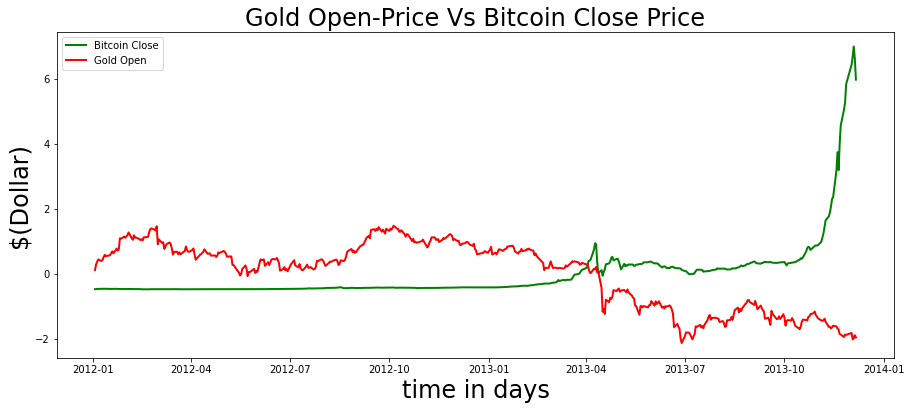

In [249]:
plt.plot(normalized_df['Close'],color='green', lw=2, label='Bitcoin Close')
plt.plot(normalized_df['GD-Open'],color='red', lw=2, label='Gold Open')
plt.title("Gold Open-Price Vs Bitcoin Close Price",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend()
plt.show()

Observation about the Results


*   We have compared the Bitcoin data with another dataset of Gold Prices.
*   From the above results it seems that gold does not have any relation with the bitcoin prices but if we closely analyse the results we can see that in recent years as bitcoin prices have increased the gold prices have fallen. 
*   But from the above its still not clear how much effect will gold have on BTC prices, we will probably need from data from different variables to come to a conclusive model.




